In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats  
from interstellar import Tracks, DenseNetwork, renormalize

In [2]:
name = 'network_10'
tracks = 'tracks_04c'
network_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'

val = pd.read_csv(f'/home/ADF/ajl573/Data/interstellar_data/{tracks}/{tracks}_val.csv')

In [3]:
network = DenseNetwork.from_config(f'{network_path}/{name}_config.json')
network.load_model(suffix='best_model')
network.load_history()
network.model.summary()

Model: "network_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

In [4]:
factors = pd.read_csv(f'/home/ADF/ajl573/Data/interstellar_data/{name}/{name}_norm.csv')

In [5]:
t = Tracks()
t.set_data(val)
# t._data['radius'] = 10**t._data['log_radius']
t.normalize(loc=factors['loc'].to_numpy(), scale=factors['scale'].to_numpy(),
            columns=[col[:-5] for col in network.x_cols+network.y_cols], inplace=True)

val = t.get_data()
val.head()

evol_stage  initial_mass  initial_Yinit  initial_feh  initial_MLT  \
0           1           1.0           0.24         -0.1          2.3   
1           1           1.0           0.24         -0.1          2.3   
2           1           1.0           0.24         -0.1          2.3   
3           1           1.0           0.24         -0.1          2.3   
4           1           1.0           0.24         -0.1          2.3   

   frac_age  effective_T  luminosity    radius     log_g  ...  frac_evol_norm  \
0  0.012770    5762.3745    0.752437  0.871547  4.557307  ...       -1.309110   
1  0.016796    5763.4970    0.755837  0.873174  4.555688  ...       -1.302925   
2  0.032922    5767.0430    0.765566  0.877695  4.551202  ...       -1.278154   
3  0.035963    5767.7230    0.767188  0.878417  4.550488  ...       -1.273483   
4  0.067231    5774.9220    0.782836  0.885120  4.543885  ...       -1.225451   

   initial_mass_norm  initial_MLT_norm  initial_Yinit_norm  \
0                0.0          1.183432           -1.428571   
1                0.0          1.183432           -1.428571   
2                0.0          1.183432           -1.428571   
3                0.0          1.183432           -1.428571   
4                0.0          1.183432           -1.428571   

   initial_Zinit_norm  log_star_age_norm  effective_T_norm  radius_norm  \
0            -0.56619          -3.698857          0.325369    -0.700701   
1            -0.56619          -3.443982          0.327236    -0.697468   
2            -0.56619          -2.818129          0.333134    -0.688479   
3            -0.56619          -2.735962          0.334265    -0.687043   
4            -0.56619          -2.154124          0.346240    -0.673718   

   delta_nu_fit_norm  star_feh_norm  
0           1.533307      -0.504890  
1           1.522501      -0.506281  
2           1.492790      -0.511842  
3           1.488078      -0.512881  
4           1.444744      -0.523512  

[5 rows x 28 columns]

In [6]:
del t

## Validation plots

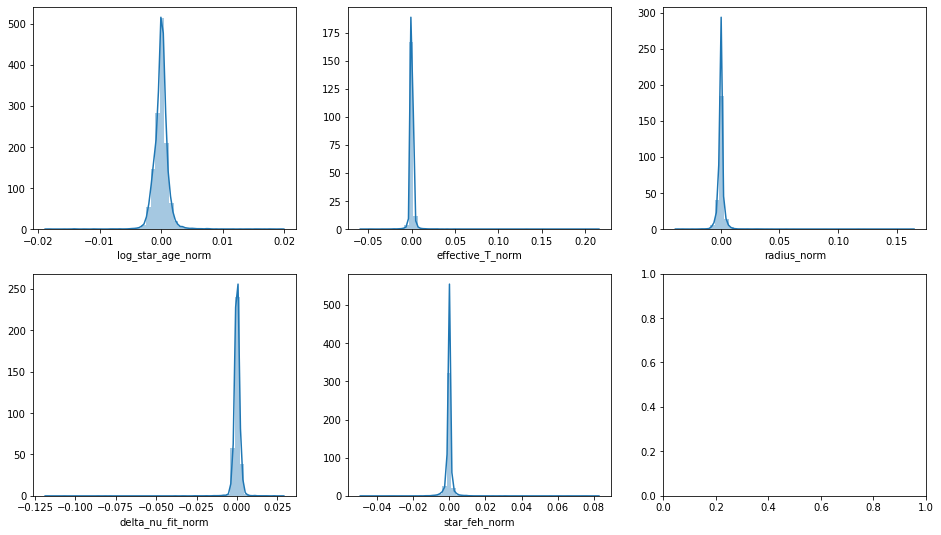

In [7]:
network.plot_metric(val.sample(20000), metric='error', save_plot=False);

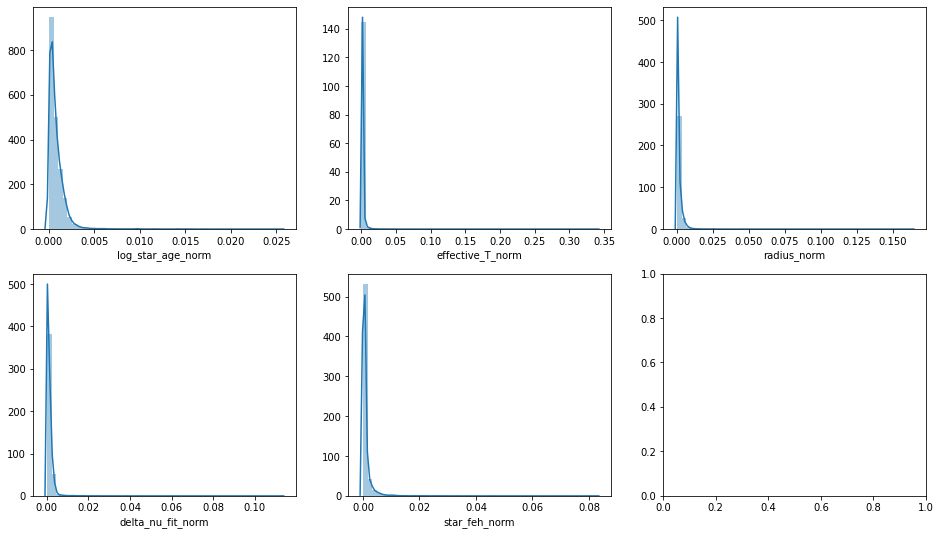

In [8]:
network.plot_metric(val.sample(20000), metric='absolute_error', save_plot=False);

In [9]:
val.head()

evol_stage  initial_mass  initial_Yinit  initial_feh  initial_MLT  \
0           1           1.0           0.24         -0.1          2.3   
1           1           1.0           0.24         -0.1          2.3   
2           1           1.0           0.24         -0.1          2.3   
3           1           1.0           0.24         -0.1          2.3   
4           1           1.0           0.24         -0.1          2.3   

   frac_age  effective_T  luminosity    radius     log_g  ...  frac_evol_norm  \
0  0.012770    5762.3745    0.752437  0.871547  4.557307  ...       -1.309110   
1  0.016796    5763.4970    0.755837  0.873174  4.555688  ...       -1.302925   
2  0.032922    5767.0430    0.765566  0.877695  4.551202  ...       -1.278154   
3  0.035963    5767.7230    0.767188  0.878417  4.550488  ...       -1.273483   
4  0.067231    5774.9220    0.782836  0.885120  4.543885  ...       -1.225451   

   initial_mass_norm  initial_MLT_norm  initial_Yinit_norm  \
0                0.0          1.183432           -1.428571   
1                0.0          1.183432           -1.428571   
2                0.0          1.183432           -1.428571   
3                0.0          1.183432           -1.428571   
4                0.0          1.183432           -1.428571   

   initial_Zinit_norm  log_star_age_norm  effective_T_norm  radius_norm  \
0            -0.56619          -3.698857          0.325369    -0.700701   
1            -0.56619          -3.443982          0.327236    -0.697468   
2            -0.56619          -2.818129          0.333134    -0.688479   
3            -0.56619          -2.735962          0.334265    -0.687043   
4            -0.56619          -2.154124          0.346240    -0.673718   

   delta_nu_fit_norm  star_feh_norm  
0           1.533307      -0.504890  
1           1.522501      -0.506281  
2           1.492790      -0.511842  
3           1.488078      -0.512881  
4           1.444744      -0.523512  

[5 rows x 28 columns]

In [10]:
# cond = val['log_g'] > 3.8

# scores = network.scores(val[cond].sample(50000), metric='error', percentiles=[0.16, 0.5, 0.84])
# scores

In [11]:
# percent_scores = np.log(10.0) * scores
# percent_scores

In [12]:
y_pred = network.model.predict(val[network.x_cols], batch_size=network.batch_size)
val_pred = pd.DataFrame(y_pred, columns=network.y_cols)

In [13]:
val_pred = val_pred.join(Tracks.renormalize(_, val_pred, factors=factors[factors['norm_column'].isin(network.y_cols)]))

In [14]:
log_cols = [col for col in val_pred.columns if 'log' in col]
log_cols

['log_star_age_norm', 'log_star_age']

In [15]:
for col in log_cols:
    val_pred[col[4:]] = 10**val_pred[col]
    if col in val.columns:
        val[col[4:]] = 10**val[col]

In [16]:
pred_cols = {col: f'{col}_pred' for col in val_pred.columns}
pred_cols

{'log_star_age_norm': 'log_star_age_norm_pred',
 'effective_T_norm': 'effective_T_norm_pred',
 'radius_norm': 'radius_norm_pred',
 'delta_nu_fit_norm': 'delta_nu_fit_norm_pred',
 'star_feh_norm': 'star_feh_norm_pred',
 'log_star_age': 'log_star_age_pred',
 'effective_T': 'effective_T_pred',
 'radius': 'radius_pred',
 'delta_nu_fit': 'delta_nu_fit_pred',
 'star_feh': 'star_feh_pred',
 'star_age_norm': 'star_age_norm_pred',
 'star_age': 'star_age_pred'}

In [17]:
val_pred.rename(columns=pred_cols, inplace=True)
val_pred.head()

log_star_age_norm_pred  effective_T_norm_pred  radius_norm_pred  \
0               -3.699455               0.326599         -0.700830   
1               -3.445124               0.328593         -0.697623   
2               -2.817850               0.333398         -0.688453   
3               -2.736269               0.334393         -0.687027   
4               -2.154311               0.346459         -0.673861   

   delta_nu_fit_norm_pred  star_feh_norm_pred  log_star_age_pred  \
0                1.534304           -0.504646          -0.937646   
1                1.523781           -0.506195          -0.818873   
2                1.493804           -0.511965          -0.525936   
3                1.489129           -0.513025          -0.487838   
4                1.446328           -0.523758          -0.216063   

   effective_T_pred  radius_pred  delta_nu_fit_pred  star_feh_pred  \
0       5763.114258     0.871482         166.053711      -0.101177   
1       5764.312500     0.873096         165.605652      -0.101737   
2       5767.201172     0.877708         164.329178      -0.103819   
3       5767.799805     0.878425         164.130081      -0.104202   
4       5775.053223     0.885048         162.307556      -0.108077   

   star_age_norm_pred  star_age_pred  
0            0.000200       0.115439  
1            0.000359       0.151749  
2            0.001521       0.297896  
3            0.001835       0.325209  
4            0.007010       0.608046

In [18]:
df = val.join(val_pred)
df.head()

evol_stage  initial_mass  initial_Yinit  initial_feh  initial_MLT  \
0           1           1.0           0.24         -0.1          2.3   
1           1           1.0           0.24         -0.1          2.3   
2           1           1.0           0.24         -0.1          2.3   
3           1           1.0           0.24         -0.1          2.3   
4           1           1.0           0.24         -0.1          2.3   

   frac_age  effective_T  luminosity    radius     log_g  ...  \
0  0.012770    5762.3745    0.752437  0.871547  4.557307  ...   
1  0.016796    5763.4970    0.755837  0.873174  4.555688  ...   
2  0.032922    5767.0430    0.765566  0.877695  4.551202  ...   
3  0.035963    5767.7230    0.767188  0.878417  4.550488  ...   
4  0.067231    5774.9220    0.782836  0.885120  4.543885  ...   

   radius_norm_pred  delta_nu_fit_norm_pred  star_feh_norm_pred  \
0         -0.700830                1.534304           -0.504646   
1         -0.697623                1.523781           -0.506195   
2         -0.688453                1.493804           -0.511965   
3         -0.687027                1.489129           -0.513025   
4         -0.673861                1.446328           -0.523758   

   log_star_age_pred  effective_T_pred  radius_pred  delta_nu_fit_pred  \
0          -0.937646       5763.114258     0.871482         166.053711   
1          -0.818873       5764.312500     0.873096         165.605652   
2          -0.525936       5767.201172     0.877708         164.329178   
3          -0.487838       5767.799805     0.878425         164.130081   
4          -0.216063       5775.053223     0.885048         162.307556   

   star_feh_pred  star_age_norm_pred  star_age_pred  
0      -0.101177            0.000200       0.115439  
1      -0.101737            0.000359       0.151749  
2      -0.103819            0.001521       0.297896  
3      -0.104202            0.001835       0.325209  
4      -0.108077            0.007010       0.608046  

[5 rows x 42 columns]

In [19]:
err_cols = [f'{col}_err' for col in pred_cols.keys()]
err_cols

['log_star_age_norm_err',
 'effective_T_norm_err',
 'radius_norm_err',
 'delta_nu_fit_norm_err',
 'star_feh_norm_err',
 'log_star_age_err',
 'effective_T_err',
 'radius_err',
 'delta_nu_fit_err',
 'star_feh_err',
 'star_age_norm_err',
 'star_age_err']

In [20]:
df[err_cols] = pd.DataFrame(df[pred_cols.keys()].to_numpy() - df[pred_cols.values()].to_numpy())

In [21]:
df.head()

evol_stage  initial_mass  initial_Yinit  initial_feh  initial_MLT  \
0           1           1.0           0.24         -0.1          2.3   
1           1           1.0           0.24         -0.1          2.3   
2           1           1.0           0.24         -0.1          2.3   
3           1           1.0           0.24         -0.1          2.3   
4           1           1.0           0.24         -0.1          2.3   

   frac_age  effective_T  luminosity    radius     log_g  ...  \
0  0.012770    5762.3745    0.752437  0.871547  4.557307  ...   
1  0.016796    5763.4970    0.755837  0.873174  4.555688  ...   
2  0.032922    5767.0430    0.765566  0.877695  4.551202  ...   
3  0.035963    5767.7230    0.767188  0.878417  4.550488  ...   
4  0.067231    5774.9220    0.782836  0.885120  4.543885  ...   

   radius_norm_err  delta_nu_fit_norm_err  star_feh_norm_err  \
0         0.000130              -0.000996          -0.000244   
1         0.000155              -0.001281          -0.000085   
2        -0.000026              -0.001014           0.000124   
3        -0.000016              -0.001051           0.000143   
4         0.000143              -0.001584           0.000246   

   log_star_age_err  effective_T_err  radius_err  delta_nu_fit_err  \
0          0.000279        -0.739758    0.000065         -0.042421   
1          0.000533        -0.815500    0.000078         -0.054532   
2         -0.000130        -0.158172   -0.000013         -0.043198   
3          0.000144        -0.076805   -0.000008         -0.044741   
4          0.000087        -0.131223    0.000072         -0.067446   

   star_feh_err  star_age_norm_err  star_age_err  
0     -0.000088       2.753356e-07      0.000074  
1     -0.000031       9.448906e-07      0.000186  
2      0.000045      -9.771751e-07     -0.000089  
3      0.000052       1.300320e-06      0.000108  
4      0.000089       3.023429e-06      0.000122  

[5 rows x 54 columns]

In [22]:
condition = (np.isclose(df['initial_MLT'], 2.1)) &\
            (np.isclose(df['initial_Yinit'], 0.26))

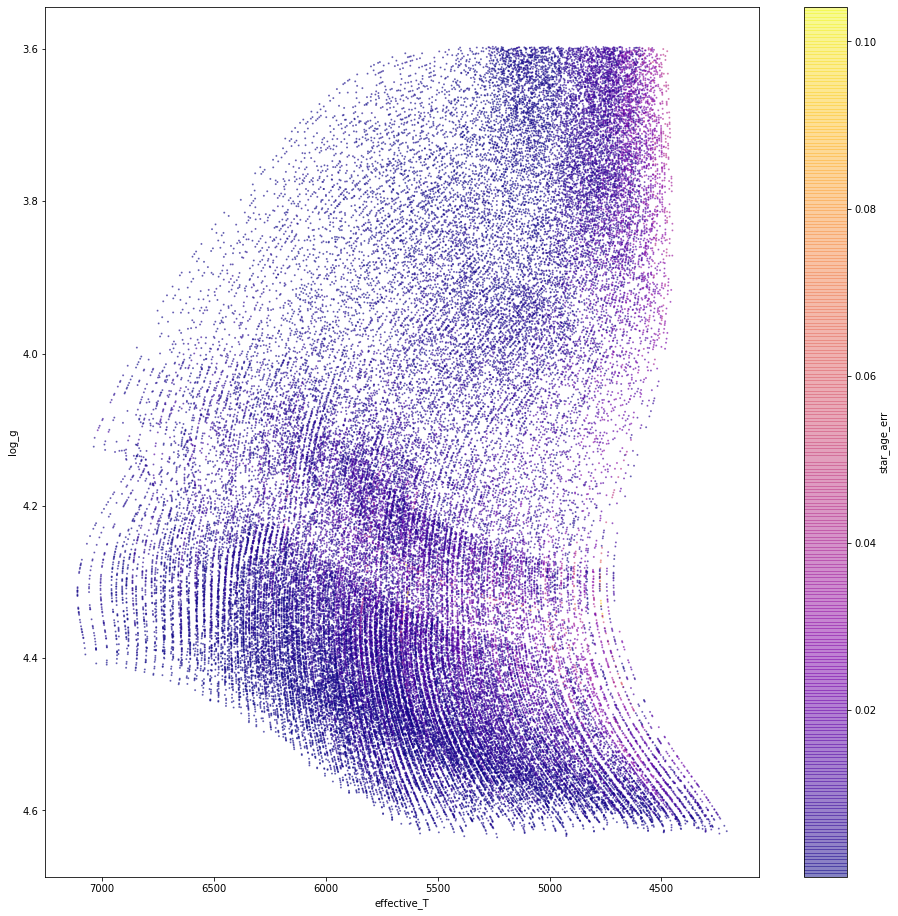

In [23]:
fig, ax = plt.subplots(figsize=(16, 16))

df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
        c='star_age_err', cmap='plasma', s=1, alpha=0.5)

ax.invert_xaxis()
ax.invert_yaxis()

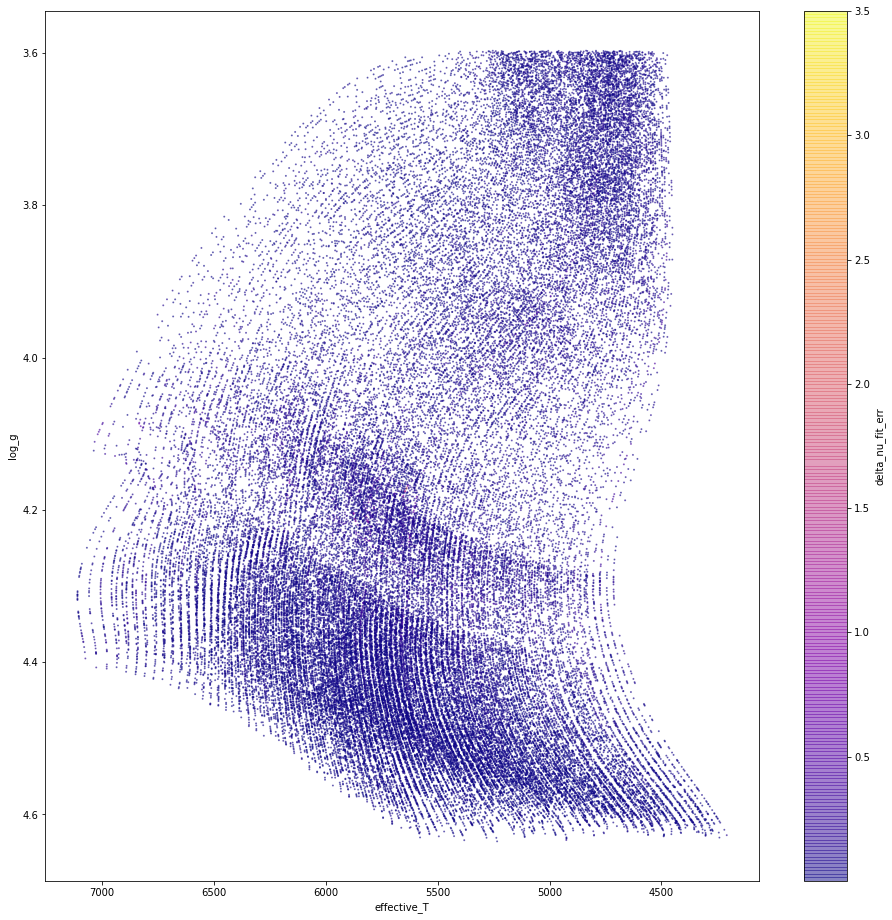

In [24]:
fig, ax = plt.subplots(figsize=(16, 16))

df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
        c='delta_nu_fit_err', cmap='plasma', s=1, alpha=0.5, vmax=3.5)

ax.invert_xaxis()
ax.invert_yaxis()

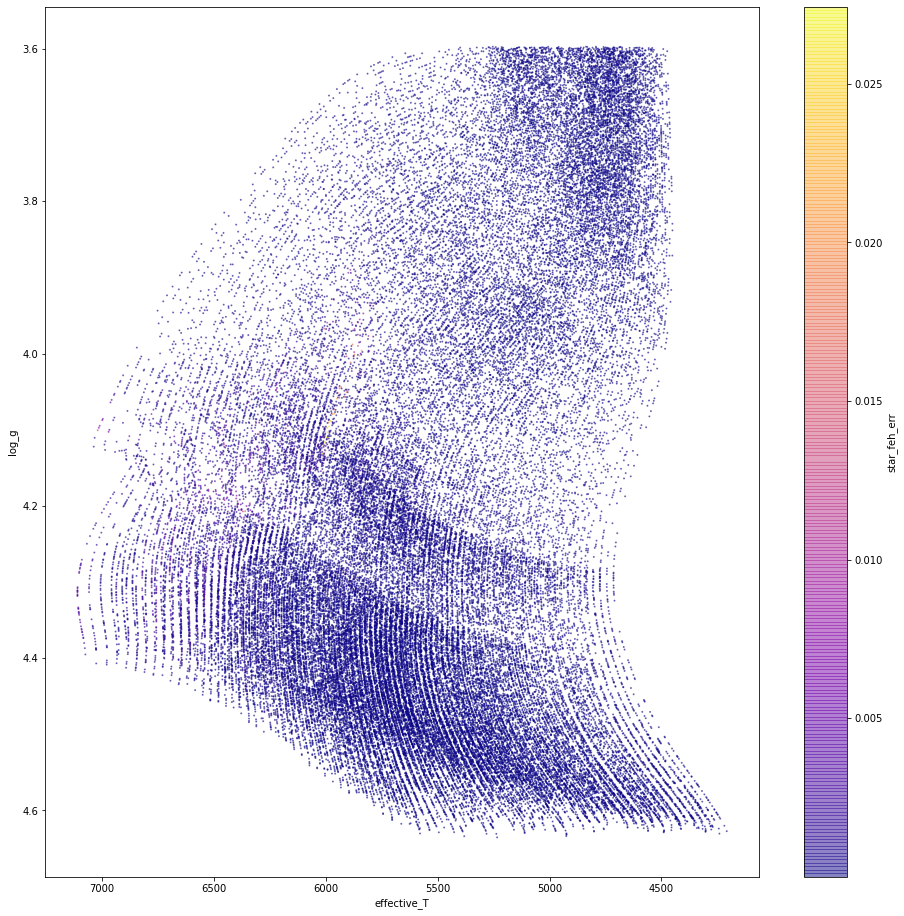

In [25]:
fig, ax = plt.subplots(figsize=(16, 16))

df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
        c='star_feh_err', cmap='plasma', s=1, alpha=0.5)

ax.invert_xaxis()
ax.invert_yaxis()

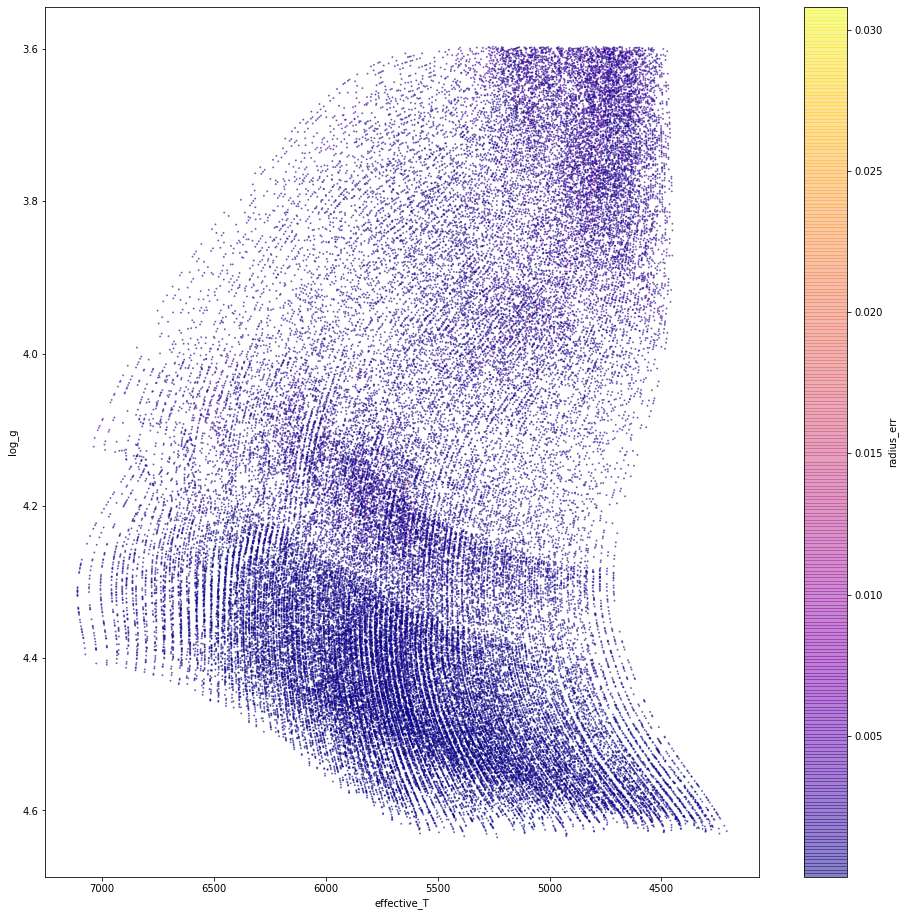

In [26]:
fig, ax = plt.subplots(figsize=(16, 16))

df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
        c='radius_err', cmap='plasma', s=1, alpha=0.5)

ax.invert_xaxis()
ax.invert_yaxis()

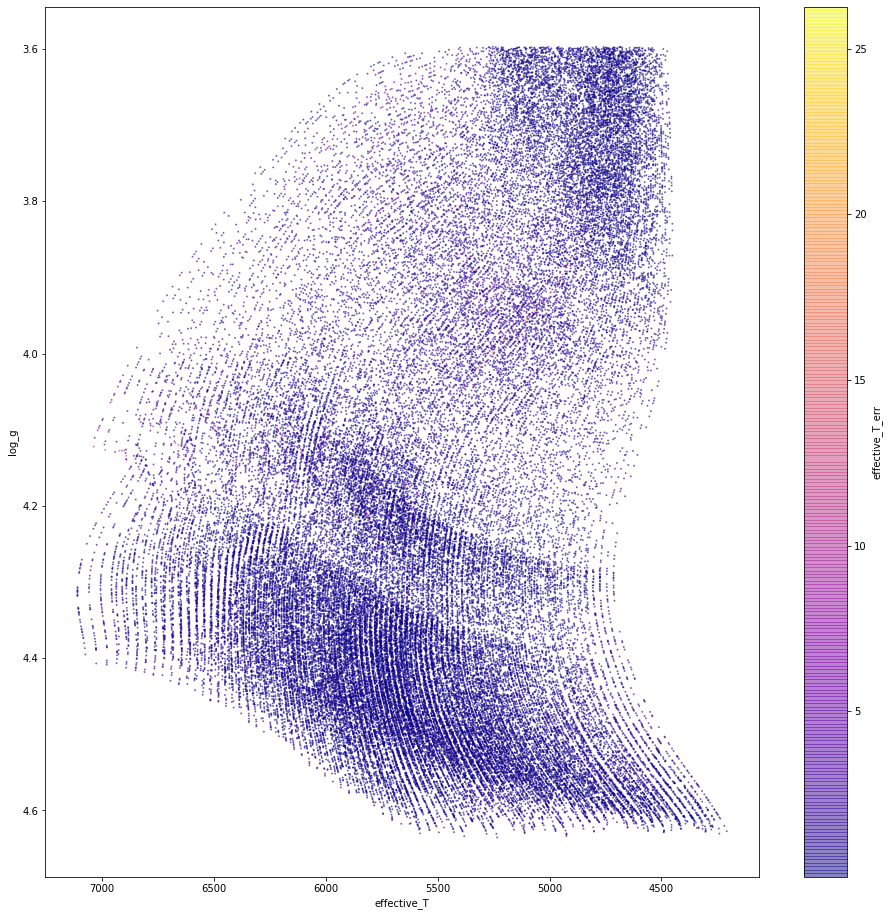

In [27]:
fig, ax = plt.subplots(figsize=(16, 16))

df[condition].abs().plot(ax=ax, kind='scatter', x='effective_T', y='log_g', 
        c='effective_T_err', cmap='plasma', s=1, alpha=0.5)

ax.invert_xaxis()
ax.invert_yaxis()

In [28]:
def plot_rolling(data, column, suffix='err', 
                 window_width=1000, window_type=None, window_kwargs={}, ax=None, subplot_kwargs={}):
    ''' Plots rolling stats of the error of a given `column` in `data`. 
    The `window_width` is the size of the convolution in rows of `data`.'''
    if ax is None:
        _, ax = plt.subplots(**subplot_kwargs)
    
    err_col = f'{column}_{suffix}'
    data_sort = data.sort_values(column)
    
    rolling_mean = data_sort[err_col].rolling(window_width, win_type=window_type).mean(**window_kwargs)
    rolling_median = data_sort[err_col].rolling(window_width, win_type=window_type).median(**window_kwargs)
    rolling_std = data_sort[err_col].rolling(window_width, win_type=window_type).std(**window_kwargs)
    
    ax.plot(data_sort[column], rolling_mean, 'k', alpha=0.8, label='rolling mean')
    ax.plot(data_sort[column], rolling_median, 'r', alpha=0.8, label='rolling median')
    ax.fill_between(data_sort[column], rolling_mean+rolling_std, rolling_mean-rolling_std, 
                    facecolor='grey', alpha=0.5, label='rolling std')
    
    ax.set_xlabel(column)
    ax.set_ylabel(err_col)
    ax.legend();
    return ax

In [54]:
df_sample = df[df['star_age'] < 15].sample(50000)

In [55]:
col = 'delta_nu_fit'
df_sample[f'{col}_rel_err'] = abs(df_sample[f'{col}_err'] / df_sample[col])

In [56]:
col = 'delta_nu_fit'
df_sample[f'{col}_abs_rel_err'] = abs(df_sample[f'{col}_rel_err'])

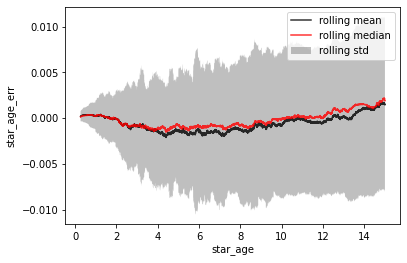

In [57]:
plot_rolling(df_sample, 'star_age');

In [58]:
# plot_rolling(df_sample, 'star_age', suffix='rel_err');

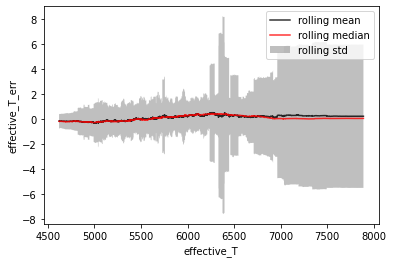

In [59]:
plot_rolling(df_sample, 'effective_T');

In [60]:
# plot_rolling(df_sample, 'effective_T', suffix='rel_err');

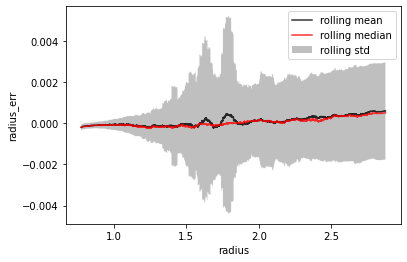

In [61]:
plot_rolling(df_sample, 'radius');

In [62]:
# plot_rolling(df_sample, 'radius', suffix='rel_err');

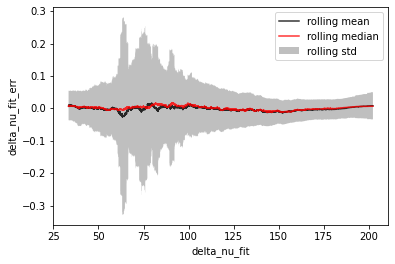

In [63]:
plot_rolling(df_sample, 'delta_nu_fit');

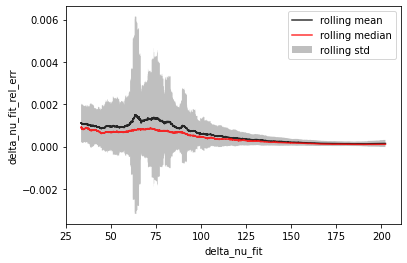

In [64]:
plot_rolling(df_sample, 'delta_nu_fit', suffix='rel_err');

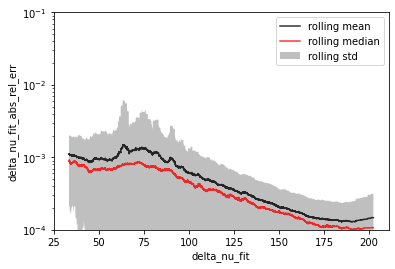

In [65]:
ax = plot_rolling(df_sample, 'delta_nu_fit', suffix='abs_rel_err')
ax.set_yscale('log')
ax.set_ylim(1e-4, 1e-1);

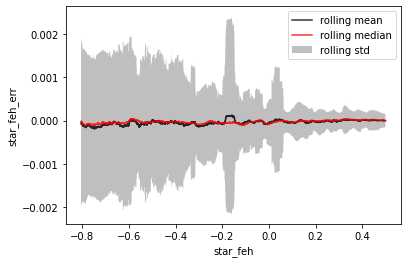

In [66]:
plot_rolling(df_sample, 'star_feh');

In [68]:
scores = network.scores(val[val['star_age']<15], metric='error', predict_kw={'batch_size': network.batch_size})
scores.head()

log_star_age_norm  effective_T_norm   radius_norm  delta_nu_fit_norm  \
count       1.640535e+06      1.640535e+06  1.640535e+06       1.640535e+06   
mean       -8.667177e-05      1.623648e-04 -6.155666e-05      -3.382613e-05   
std         1.381257e-03      3.458227e-03  3.154726e-03       2.463825e-03   
min        -3.587516e-02     -5.264427e-01 -1.639355e-01      -1.706420e-01   
25%        -7.127583e-04     -5.500745e-04 -7.563508e-04      -8.107097e-04   

       star_feh_norm  
count   1.640535e+06  
mean   -7.669690e-05  
std     2.872822e-03  
min    -7.954497e-02  
25%    -5.010686e-04

In [69]:
scale_scores = factors.loc[5:, 'scale'].to_numpy() * scores
scale_scores

log_star_age_norm  effective_T_norm    radius_norm  delta_nu_fit_norm  \
count      766129.845000      9.862437e+08  825189.105000       6.985726e+07   
mean           -0.000040      9.760917e-02      -0.000031      -1.440384e-03   
std             0.000645      2.078989e+00       0.001587       1.049146e-01   
min            -0.016754     -3.164826e+02      -0.082460      -7.266278e+00   
25%            -0.000333     -3.306894e-01      -0.000380      -3.452164e-02   
50%            -0.000032      8.856118e-02      -0.000113       5.040823e-04   
75%             0.000204      5.153417e-01       0.000213       3.459934e-02   
max             0.010968      2.049486e+02       0.099600       6.478300e+00   

       star_feh_norm  
count  592233.135000  
mean       -0.000028  
std         0.001037  
min        -0.028716  
25%        -0.000181  
50%        -0.000014  
75%         0.000115  
max         0.055175

In [70]:
log_cols = [col for col in scale_scores.columns if 'log' in col]
log_cols

['log_star_age_norm']

In [71]:
scale_scores[[col[4:] for col in log_cols]] = scale_scores[log_cols] * np.log(10.0)

In [72]:
scale_scores.loc['std'].round(5)

log_star_age_norm    0.00065
effective_T_norm     2.07899
radius_norm          0.00159
delta_nu_fit_norm    0.10491
star_feh_norm        0.00104
star_age_norm        0.00149
Name: std, dtype: float64

In [73]:
def plot_err_dist(data, column, x_range):
    mle_norm = stats.norm.fit(df[column])
    mle_t = stats.t.fit(df[column])

    x = np.linspace(*x_range, 500)
    pdf_norm = stats.norm.pdf(x, *mle_norm)
    pdf_t = stats.t.pdf(x, *mle_t)
    
    ax = df.plot(kind='hist', y=column, bins=100, range=x_range, density=True, facecolor='grey')
    ax.plot(x, pdf_norm, 'r', label='normal')
    ax.plot(x, pdf_t, 'b', label="student's t")

    ax.set_xlim(x_range)
    ax.legend()
    return ax

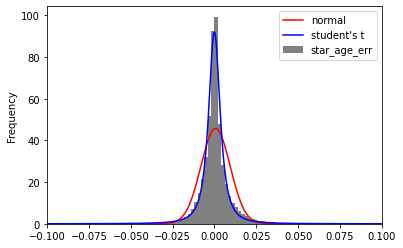

In [74]:
plot_err_dist(df, 'star_age_err', (-0.1, 0.1));

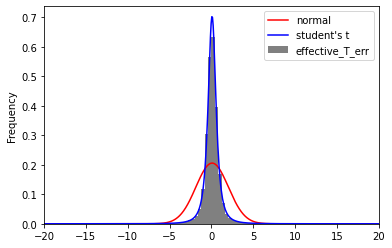

In [75]:
plot_err_dist(df, 'effective_T_err', (-20, 20));

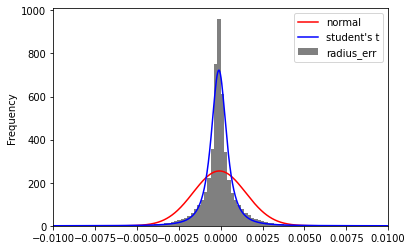

In [76]:
plot_err_dist(df, 'radius_err', (-0.01, 0.01));

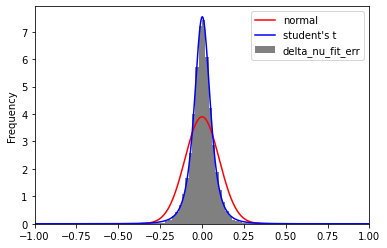

In [77]:
plot_err_dist(df, 'delta_nu_fit_err', (-1, 1));

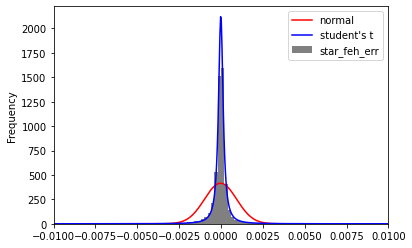

In [78]:
plot_err_dist(df, 'star_feh_err', (-0.01, 0.01));